In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv(r"C:\Users\jason\Desktop\cse 151a\hw4\heart.csv")
y = df['target']
X = df.drop(columns = ['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 200, random_state=42)

In [32]:
# Initialize model and initial error calculations
model = LogisticRegression(max_iter=1000, penalty = 'none').fit(X_train, y_train)
coefs = model.coef_

pred = model.predict(X_test) 
error = np.sum(np.log(np.exp(((-y_test.values * np.matmul(model.coef_, X_test.values.T)) + model.intercept_[0])[0]) + 1))

# Initialize lists to count iterations/losses/coordinate value
iterations = 0
losses = {}
coordinate_descent = {}

for i in range(len(coefs[0])):
    coordinate_descent[X_test.columns[i]] = []
    losses[X_test.columns[i]] = []
    while True:
        
        lr = 0.00001
        coefs = model.coef_
        error = np.sum(np.log(np.exp(((-y_test.values * np.matmul(coefs, X_test.values.T)) + model.intercept_[0])[0]) + 1))
        
        # Update Step
        update = lr* np.sum(X_test[X_test.columns[i]].values * np.min(model.predict_proba(X_test), axis = 1) * y_test.values)
        coefs[0][i] -= update
        model.coef_ = coefs

        pred = model.predict(X_test)
        print(iterations)

        # Stopping condition (I used -0.001 as there is some rounding error that prevented it from breaking even though convergence is reached, this can be thought of ~0)
        if np.sum(np.log(np.exp(((-y_test.values * np.matmul(model.coef_, X_test.values.T)) + model.intercept_[0])[0]) + 1))-error >=-0.001:
            break
        
        # Appending to lists
        coordinate_descent[X_test.columns[i]].append(coefs[0][i])
        losses[X_test.columns[i]].append(error)
        iterations +=1
        
print(f'Iterations: {iterations}')

0
0
0
0
0
0
0
0
0
0
0
0
0
Iterations: 0


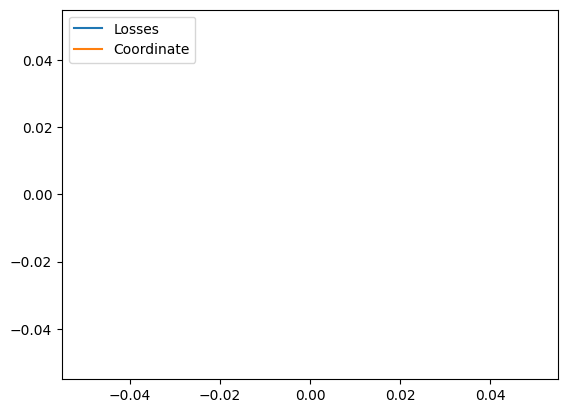

In [27]:
plt.plot(range(len(losses['age'])), losses['age'], label = 'Losses')
plt.plot(range(len(losses['age'])), coordinate_descent['age'], label = 'Coordinate')
plt.legend(loc="upper left")
plt.show()